# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [9]:
iris = load_iris()

In [10]:
iris_df = pd.DataFrame(data=iris.data,columns= iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [24]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [25]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9666666666666667


In [27]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [28]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.31666666666666665
평가 데이터 점수: 0.4


In [30]:
cross_validate(estimator=KNeighborsClassifier(),
              X=X,y=y,
              cv=5,
              n_jobs=-1,
              verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


{'fit_time': array([0.00099754, 0.00199413, 0.00099707, 0.00099587, 0.00698042]),
 'score_time': array([0.00299287, 0.00199461, 0.00199294, 0.00299287, 0.00399065]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [31]:
param_grid = [{'n_neighbors':[3,5,7],
              'weights':['uniform','distance'],
              'algorithm':['ball_tree','kd_tree','brute']}]

In [32]:
gs = GridSearchCV(estimator=KNeighborsClassifier(),
                 param_grid=param_grid,
                 n_jobs=-1,
                 verbose=True)

In [33]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [34]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [35]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [47]:
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z,**params)
    
    return out

In [48]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [49]:
# n_comp를2로 했기 때문에 2개의 feature
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,8.041931,-25.967154,0
1,8.610502,-28.476410,0
2,7.478032,-28.686361,0
3,7.706121,-28.988533,0
4,7.536898,-25.871620,0
...,...,...,...
145,-4.494464,17.907873,2
146,-4.731976,14.621047,2
147,-4.703335,16.988760,2
148,-3.600294,18.307102,2


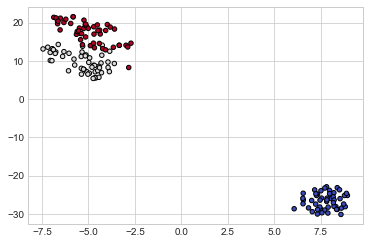

In [50]:
plt.scatter(X_comp[:,0],X_comp[:,1],
           c = y, cmap= plt.cm.coolwarm, s=20, edgecolors='k')

In [51]:
model = KNeighborsClassifier()
model.fit(X_comp,y)
predict = model.predict(X_comp)

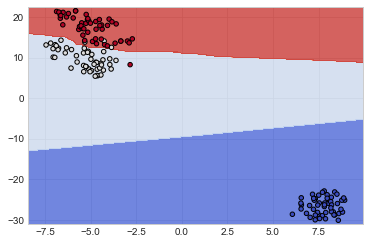

In [54]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

### 유방암 데이터

In [55]:
cancer = load_breast_cancer()

In [56]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [57]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [58]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['Target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.185600,0.102100,0.1989,0.05884,...,30.44,142.00,1313.0,0.1251,0.24140,0.382900,0.18250,0.2576,0.07602,0
1,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.024710,0.1792,0.05897,...,19.64,97.96,657.0,0.1275,0.31040,0.256900,0.10540,0.3387,0.09638,1
2,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,22.25,82.74,523.4,0.1013,0.07390,0.007732,0.02796,0.2171,0.07037,1
3,13.85,15.18,88.99,587.4,0.09516,0.07688,0.044790,0.037110,0.2110,0.05853,...,21.74,98.37,670.0,0.1185,0.17240,0.145600,0.09993,0.2955,0.06912,1
4,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.106000,0.2092,0.06310,...,24.13,135.10,1321.0,0.1280,0.22970,0.262300,0.13250,0.3021,0.07987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,10.86,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,...,24.77,74.08,412.3,0.1001,0.07348,0.000000,0.00000,0.2458,0.06592,1
451,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,0.06877,...,23.99,180.90,2073.0,0.1696,0.42440,0.580300,0.22480,0.3222,0.08009,0
452,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,26.51,76.43,407.5,0.1428,0.25100,0.212300,0.09861,0.2289,0.08278,1
453,13.34,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,0.06902,...,23.19,96.66,614.9,0.1536,0.47910,0.485800,0.17080,0.3527,0.10160,1


In [59]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['Target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,0.06401,...,21.59,86.57,549.8,0.1526,0.14770,0.1490,0.09815,0.2804,0.08024,1
1,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,...,33.47,111.80,888.3,0.1851,0.40610,0.4024,0.17160,0.3383,0.10310,0
2,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,...,25.00,140.90,1485.0,0.1434,0.27630,0.3853,0.17760,0.2812,0.08198,0
3,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,36.91,110.10,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165,0
4,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,...,20.53,84.93,476.1,0.1610,0.24290,0.2247,0.13180,0.3343,0.09215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,22.94,78.28,424.8,0.1213,0.25150,0.1916,0.07926,0.2940,0.07587,1
110,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,...,28.22,184.20,2403.0,0.1228,0.35830,0.3948,0.23460,0.3589,0.09187,0
111,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.18790,0.1544,0.03846,0.1652,0.07722,1
112,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.30940,0.3403,0.14180,0.2218,0.07820,0


In [63]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [61]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9538461538461539
평가 데이터 점수: 0.9122807017543859


In [64]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [65]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.3626373626373626
평가 데이터 점수: 0.41228070175438597


In [66]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

In [67]:
cross_validate(estimator=estimator,
              X=X, y=y,
              cv=5,
              n_jobs=-1,
              verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


{'fit_time': array([0.00099611, 0.00198555, 0.00299215, 0.0009973 , 0.00498891]),
 'score_time': array([0.02100158, 0.04801583, 0.01748729, 0.02098203, 0.01099753]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [68]:
pipe = Pipeline(
        [('scaler',StandardScaler()),
        ('model',KNeighborsClassifier())])

In [72]:
param_grid = [{'model__n_neighbors':[3,5,7],
           'model__weights':['uniform','distance'],
           'model__algorithm':['ball tree','kd tree', 'brute']}]

In [73]:
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 verbose=True)

In [74]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\rla02\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\rla0

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__algorithm': ['ball tree', 'kd tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [75]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=7))])

In [76]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [77]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [80]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,9.100062,-32.466679,0
1,10.266253,-30.016237,0
2,5.842272,-28.522930,0
3,6.286945,25.221369,0
4,5.313621,-26.191986,0
...,...,...,...
564,11.942802,-30.052034,0
565,6.914895,-28.213499,0
566,-8.946594,-18.638863,0
567,8.210118,-29.333757,0


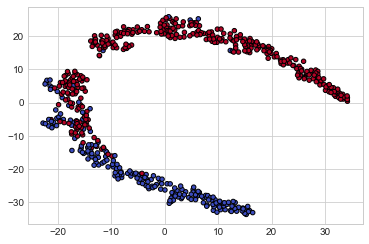

In [81]:
plt.scatter(X_comp[:,0],X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k')

In [83]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

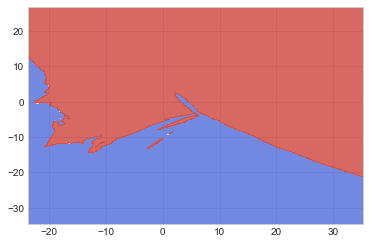

In [84]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.8)

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors='k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [85]:
boston = load_boston()

C:\Users\rla02\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [86]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [100]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [101]:
boston_train_df = pd.DataFrame(data=X_train, columns=boston.feature_names)
boston_train_df['target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
1,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,21.5
2,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03,22.4
3,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
4,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6
400,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
401,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,25.0
402,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1


In [102]:
boston_test_df = pd.DataFrame(data=X_test, columns=boston.feature_names)
boston_test_df['target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03,16.1
1,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8
2,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59,33.8
3,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
4,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
98,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
99,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45,22.8
100,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51,23.3


In [103]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [107]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [108]:
print("학습 데이터 점수: {}".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.6961197836417342
평가 데이터 점수: 0.4596515777066964


In [109]:
model = KNeighborsRegressor()
model.fit(X_train_scale,y_train)

KNeighborsRegressor()

In [110]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale,y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale,y_test)))

학습 데이터 점수: 0.8432066920130022
평가 데이터 점수: 0.6468549299089101


In [111]:
estimator = make_pipeline(StandardScaler(),
                         KNeighborsRegressor())

In [112]:
cross_validate(estimator=estimator,
              X=X, y=y,
              cv=5,
              n_jobs=-1,
              verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


{'fit_time': array([0.00199509, 0.00199533, 0.00199509, 0.00199509, 0.00199485]),
 'score_time': array([0.00199509, 0.00299406, 0.00199509, 0.00199509, 0.00199461]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [113]:
pipe = Pipeline(
        [('scaler',StandardScaler()),
        ('model',KNeighborsRegressor())])

In [114]:
param_grid = [{'model__n_neighbors':[3,5,7],
           'model__weights':['uniform','distance'],
           'model__algorithm':['ball tree','kd tree', 'brute']}]

In [115]:
gs = GridSearchCV(estimator=pipe,
                 param_grid=param_grid,
                 n_jobs=-1,
                 verbose=True)

In [118]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\rla02\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\rla02\miniconda3\lib\site-packages\sklearn\neighbors\_regression.py", line 213, in fit
    return self._fit(X, y)
  File "C:\Users\rla02\mi

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'model__algorithm': ['ball tree', 'kd tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [119]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [120]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [136]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rla02\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [137]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,21.632463,24.0
1,46.358181,21.6
2,44.316956,34.7
3,43.551651,33.4
4,44.174614,36.2
...,...,...
501,29.009478,22.4
502,29.660433,20.6
503,30.447630,23.9
504,30.408678,22.0


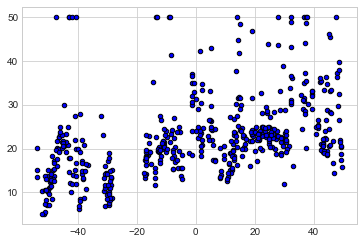

In [138]:
plt.scatter(X_comp,y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolors='k')

In [139]:
model = KNeighborsRegressor()
model.fit(X_comp,y)
predict = model.predict(X_comp)

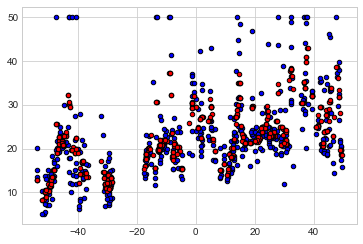

In [140]:
plt.scatter(X_comp,y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolors='k')
plt.scatter(X_comp,predict, c = 'r', cmap = plt.cm.coolwarm, s = 20, edgecolors='k')

### 캘리포니아 주택 가격 데이터